In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")


In [19]:
# Load the dataset
df = pd.read_csv('data/2024-09-20.csv')

# Display the first few rows to verify
print(df.head())


                                        Title         Date      Mileage  \
0                 Honda CB 1000 RA SC-Project  FR 04/2022    23,775 km    
1                Honda CB 1000 RA *Neuwertig*  FR 04/2022     3,400 km    
2   Honda CB 1000 R SC 80, Reifen+Service neu  FR 05/2022    21,550 km    
3                              Honda CB1000RA  FR 03/2021     9,890 km    
4  Honda CB1000R Black Edition / Finanzierung  FR 05/2022     1,490 km    

     Price  
0   €9,990  
1  €11,990  
2   €8,990  
3   €8,900  
4  €11,500  


In [20]:
# Extract 'MM/YYYY' from 'Date' and convert to datetime
df['Date'] = pd.to_datetime(df['Date'].str.extract(r'(\d{2}/\d{4})')[0], format='%m/%Y')


In [21]:
# Clean 'Price' column: Remove '€', commas, and whitespace, then convert to float
df['Price'] = df['Price'].replace({'€': '', ',': '', '\s': ''}, regex=True).astype(float)

# Clean 'Mileage' column: Remove 'km', commas, and whitespace, then convert to float
df['Mileage'] = df['Mileage'].replace({'km': '', ',': '', '\s': ''}, regex=True).astype(float)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_16020/754456906.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['Price'] = df['Price'].replace({'€': '', ',': '', '\s': ''}, regex=True).astype(float)
/tmp/ipykernel_16020/754456906.py:5: SyntaxWarning: invalid escape sequence '\s'
  df['Mileage'] = df['Mileage'].replace({'km': '', ',': '', '\s': ''}, regex=True).astype(float)


In [22]:
# Define 'today' as September 2024
today = pd.Timestamp('2024-09-01')

# Function to calculate the number of months between two dates
def calculate_months_from_today(date, today):
    return (today.year - date.year) * 12 + (today.month - date.month)

# Apply the function to create 'MonthsFromToday'
df['MonthsFromToday'] = df['Date'].apply(lambda x: calculate_months_from_today(x, today))

# Verify the calculation
print(df[['Date', 'MonthsFromToday']].head())


        Date  MonthsFromToday
0 2022-04-01               29
1 2022-04-01               29
2 2022-05-01               28
3 2021-03-01               42
4 2022-05-01               28


In [23]:
# Group by 'MonthsFromToday' and calculate required metrics
monthly_stats = df.groupby('MonthsFromToday').agg(
    Average_Price=('Price', 'mean'),
    Minimum_Price=('Price', 'min'),
    Average_Mileage=('Mileage', 'mean')
).reset_index()

# Sort the DataFrame by 'MonthsFromToday' ascending (0 is current)
monthly_stats = monthly_stats.sort_values('MonthsFromToday')

# Display the aggregated data
print(monthly_stats.head())


   MonthsFromToday  Average_Price  Minimum_Price  Average_Mileage
0                3   12590.000000        12590.0       290.000000
1                4   12790.000000        12790.0       999.000000
2                5   13490.000000        13490.0      2990.000000
3                6   13056.666667        11990.0      1248.333333
4                7   12990.000000        12990.0      1372.000000


In [24]:
def plot_metric(ax, x, y, title, xlabel, ylabel, color, label):
    sns.scatterplot(ax=ax, x=x, y=y, color=color, label=label)
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(x.values.reshape(-1, 1), y.values)
    
    # Define future x-values (extend 24 months beyond last data point)
    last_month = x.max()
    future_x = np.arange(x.min(), last_month + 24 + 1).reshape(-1, 1)
    
    # Predict y-values
    y_pred = model.predict(future_x)
    
    # Plot regression line
    ax.plot(future_x.flatten(), y_pred, color='red', label='Trend Line')
    
    # Set titles and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()


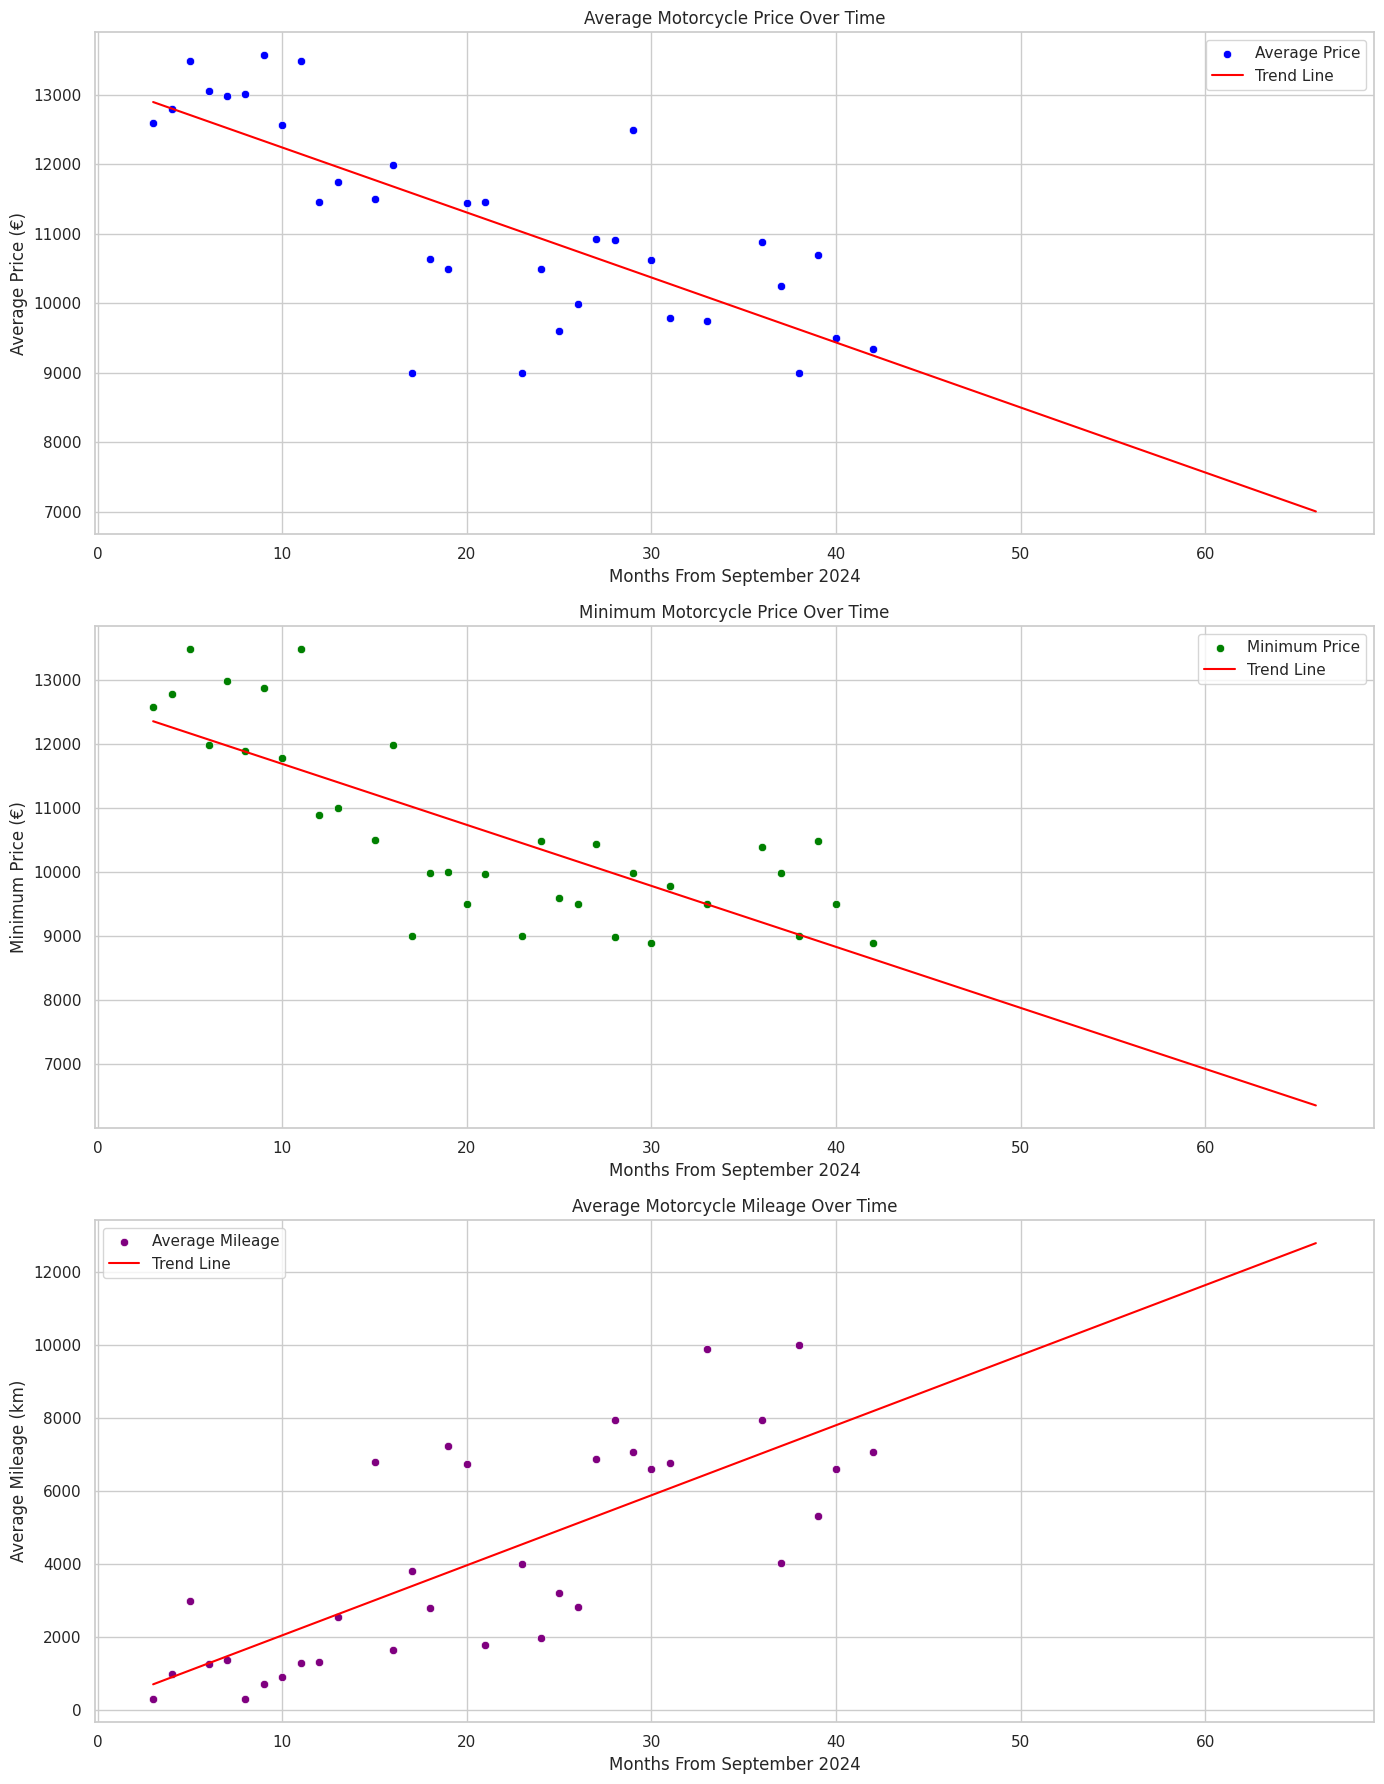

In [25]:
# Initialize the matplotlib figure
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: Average Price
plot_metric(
    ax=axes[0],
    x=monthly_stats['MonthsFromToday'],
    y=monthly_stats['Average_Price'],
    title='Average Motorcycle Price Over Time',
    xlabel='Months From September 2024',
    ylabel='Average Price (€)',
    color='blue',
    label='Average Price'
)

# Plot 2: Minimum Price
plot_metric(
    ax=axes[1],
    x=monthly_stats['MonthsFromToday'],
    y=monthly_stats['Minimum_Price'],
    title='Minimum Motorcycle Price Over Time',
    xlabel='Months From September 2024',
    ylabel='Minimum Price (€)',
    color='green',
    label='Minimum Price'
)

# Plot 3: Average Mileage
plot_metric(
    ax=axes[2],
    x=monthly_stats['MonthsFromToday'],
    y=monthly_stats['Average_Mileage'],
    title='Average Motorcycle Mileage Over Time',
    xlabel='Months From September 2024',
    ylabel='Average Mileage (km)',
    color='purple',
    label='Average Mileage'
)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()
